# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import urllib
import os 

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = imread("data/foto_clase.png")
image.shape

(797, 1767, 4)

Muestra la imagen para ver que se ha cargado bien

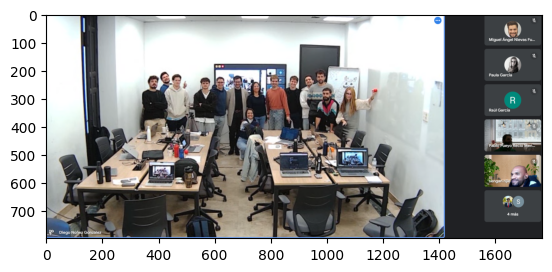

In [3]:
plt.imshow(image)

In [4]:
image.size

5633196

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [5]:
alto = 797
ancho =  1767
color = 3
alto, ancho, color = image.shape
imagen_reshaped = image.reshape(alto * ancho, color)
print("Forma original de la imagen:", image.shape)
print("Forma transformada de la imagen:", imagen_reshaped.shape)

Forma original de la imagen: (797, 1767, 4)
Forma transformada de la imagen: (1408299, 4)


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [6]:
kmeans = KMeans(n_clusters=30, n_init=10, random_state=101).fit(imagen_reshaped)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [7]:
kmeans.labels_

array([2, 7, 7, ..., 2, 2, 2], dtype=int32)

In [8]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.1283285 , 0.13078916, 0.13983923, 1.        ],
       [0.397707  , 0.61637   , 0.9558336 , 1.        ],
       [0.397707  , 0.61637   , 0.9558336 , 1.        ],
       ...,
       [0.1283285 , 0.13078916, 0.13983923, 1.        ],
       [0.1283285 , 0.13078916, 0.13983923, 1.        ],
       [0.1283285 , 0.13078916, 0.13983923, 1.        ]], dtype=float32)

In [9]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

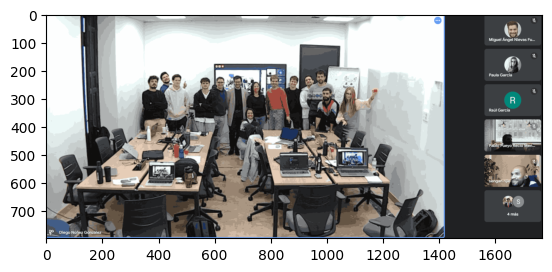

In [10]:
plt.imshow(segmented_img)

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [50]:
segmented_img = segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

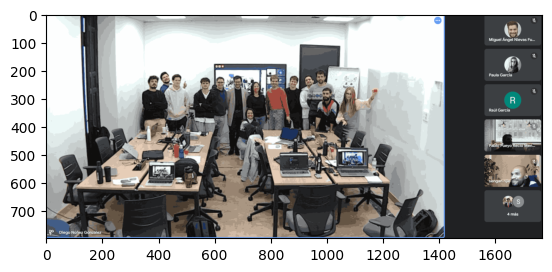

In [52]:
plt.imshow(segmented_img)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [ ]:
def reducir_colores_imagen(img, num_colores, mostrar=True, guardar=False):
    img_flat = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_colores).fit(img_flat)
    img_centroid = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape).astype('uint8')
    
    if mostrar:
        plt.imshow(img_centroid)
        plt.axis('off')
        plt.show()
    
    if guardar:
        plt.imsave('imagen_reducida.png', img_centroid)